<a href="https://colab.research.google.com/github/nazmus007/Ensemble_models/blob/main/Ensemble_sarc_pol_run1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -qq transformers

     |████████████████████████████████| 4.2 MB 5.0 MB/s 
     |████████████████████████████████| 596 kB 56.8 MB/s 
     |████████████████████████████████| 86 kB 5.8 MB/s 
     |████████████████████████████████| 6.6 MB 53.1 MB/s 


In [ ]:
!pip install sentencepiece

     |████████████████████████████████| 1.2 MB 4.3 MB/s 


In [ ]:
!pip install wandb

     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 144 kB 49.6 MB/s 
     |████████████████████████████████| 181 kB 51.7 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=b9b4d0932ff9d3862f7cd5126cafd03f4bf3ec55b98f67461000755b00584316
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
!wandb login

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
import transformers

from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup, RobertaForSequenceClassification, BertForSequenceClassification,DistilBertModel, DistilBertTokenizer,DistilBertForSequenceClassification,XLNetTokenizer, XLNetModel,XLNetForSequenceClassification, ElectraTokenizer, ElectraForSequenceClassification,RobertaTokenizer, TFRobertaModel


import torch
import re
import numpy as np
import pandas as pd

import seaborn as sns

from pylab import rcParams

import matplotlib.pyplot as plt

from matplotlib import rc

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report

from collections import defaultdict

from textwrap import wrap

from torch import nn, optim

from torch.utils.data import Dataset, DataLoader

In [ ]:
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
tokenizer = ElectraTokenizer.from_pretrained('google/electra-base-discriminator')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/666 [00:00<?, ?B/s]

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
!pip install sentencepiece


     |████████████████████████████████| 1.2 MB 5.2 MB/s 


In [ ]:
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')


Downloading:   0%|          | 0.00/779k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/760 [00:00<?, ?B/s]

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [ ]:
df_train = pd.read_csv('./drive/MyDrive/Sarc Pol/sarc_pol_train.csv')
df_train.head()

,Unnamed: 0,index,Tweet,Label
0,0,0,JUST YOU SHUT THE FUCK UP AND GET BACK TO TROO...,1
1,1,1,When all else fails blame Pepe,1
2,2,2,Well at least he is doing a white people drug .,1
3,3,3,I'm sure he will come into meetings with a com...,1
4,4,4,I'm so shocked,1


In [ ]:
df_val = pd.read_csv("./drive/MyDrive/Sarc Pol/sarc_pol_dev.csv")
df_val.head()

,Unnamed: 0,index,Tweet,Label
0,0,0,Why do you hate their freedom to be ultragigah...,1
1,1,1,"But remeber guys hes different , hes not the e...",0
2,2,2,"That's true , we all deserve better than Bush ...",0
3,3,3,at least we know they are making good use of t...,1
4,4,4,I'm sure this won't affect prices of anything ...,1


In [ ]:
df_test = pd.read_csv("./drive/MyDrive/Sarc Pol/sarc_pol_test.csv")
df_test.head()

,Unnamed: 0,index,Tweet,Label
0,0,0,And we're upset since the Democrats would * ne...,1
1,1,1,Oooh baby you caught me red handed Creepin ' o...,0
2,2,2,"TIL , voluntary slavery by starving people who...",1
3,3,3,Welcome to china,0
4,4,4,That'd be great if only Ron Paul wasn't A CHRI...,1


In [ ]:
df_train.shape, df_val.shape, df_test.shape

((10934, 4), (2734, 4), (3406, 4))

In [ ]:
pdList = [df_train, df_val,df_test]
df = pd.concat(pdList)

In [ ]:
df.shape

(17074, 4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


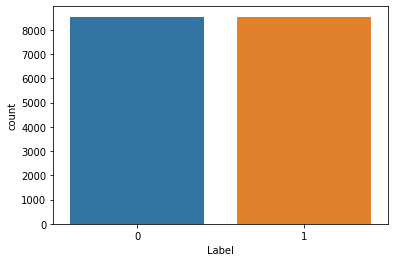

In [ ]:
import seaborn as sns
sns.countplot(df.Label)
plt.xlabel('Label');

In [ ]:
cols= ["Tweet"]

In [ ]:
file1 = pd.read_fwf("./drive/MyDrive/Sarc Pol/dev.txt", delimiter="\n", names= cols)

In [ ]:
cols2 = ["Label"]

In [ ]:
file2 = pd.read_fwf("./drive/MyDrive/Sarc Pol/dev_labels.txt", delimiter = "\n",names=cols2)

In [ ]:
file1.reset_index(inplace = True)

In [ ]:
file2.reset_index(inplace = True)

In [ ]:
df_val = file1.merge(file2, on='index')

In [ ]:
df_val.to_csv("./drive/MyDrive/Sarc Pol/sarc_pol_dev.csv")

In [ ]:
df_val.head()

,index,Tweet,Label
0,0,Why do you hate their freedom to be ultragigah...,1
1,1,"But remeber guys hes different , hes not the e...",0
2,2,"That's true , we all deserve better than Bush ...",0
3,3,at least we know they are making good use of t...,1
4,4,I'm sure this won't affect prices of anything ...,1


In [ ]:
file3 = pd.read_fwf("./drive/MyDrive/Sarc Pol/test.txt", delimiter="\n", names= cols)

In [ ]:
file4 = pd.read_fwf("./drive/MyDrive/Sarc Pol/test_labels.txt", delimiter = "\n",names=cols2)

In [ ]:
file3.reset_index(inplace = True)

In [ ]:
file4.reset_index(inplace = True)

In [ ]:
df_test = file3.merge(file4, on='index')

In [ ]:
df_test.to_csv("./drive/MyDrive/Sarc Pol/sarc_pol_test.csv")

In [ ]:
df_test.head()

,index,Tweet,Label
0,0,And we're upset since the Democrats would * ne...,1
1,1,Oooh baby you caught me red handed Creepin ' o...,0
2,2,"TIL , voluntary slavery by starving people who...",1
3,3,Welcome to china,0
4,4,That'd be great if only Ron Paul wasn't A CHRI...,1


In [ ]:
token_lens = []

for txt in df_train.Tweet:
  tokens = tokenizer.encode(txt, truncation =True)
  token_lens.append(len(tokens))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


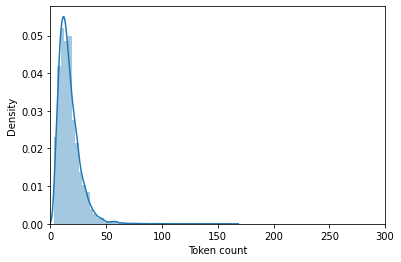

In [ ]:
sns.distplot(token_lens)
plt.xlim([0, 300]);
plt.xlabel('Token count');

In [ ]:
MAX_LEN =70

In [ ]:
class TheDataset(torch.utils.data.Dataset):

    def __init__(self, tweets,labels, tokenizer):
        self.tweets     = tweets 
        self.labels = labels
        self.tokenizer  = tokenizer
        self.max_len    = MAX_LEN
  
    def __len__(self):
        return len(self.tweets)
  
    def __getitem__(self, index):
        Tweet = str(self.tweets[index])
        Label = self.labels[index]

        encoded_tweet = self.tokenizer.encode_plus(
            Tweet,
            add_special_tokens    = True,
            max_length            = self.max_len,
            return_token_type_ids = False,
            return_attention_mask = True,
            return_tensors        = "pt",
            padding               = "max_length",
            truncation            = True
        )

        return {
            'input_ids': encoded_tweet['input_ids'][0],
            'attention_mask': encoded_tweet['attention_mask'][0],
            'labels': torch.tensor(Label, dtype=torch.long)
        }

In [ ]:
from sklearn.utils import shuffle
df_train = shuffle(df_train)

In [ ]:
from sklearn.utils import shuffle
df_test = shuffle(df_test)

In [ ]:
from sklearn.utils import shuffle
df_val = shuffle(df_val)

In [ ]:
RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
df_train, df_val = train_test_split(df_train, test_size=0.125, random_state=RANDOM_SEED)

In [ ]:
df_train.shape, df_test.shape, df_val.shape

((10934, 4), (3406, 3), (2734, 3))

In [ ]:
train_set_dataset = TheDataset(
    tweets    = df_train.Tweet.tolist(),
    labels = df_train.Label.tolist(),
    tokenizer  = tokenizer

    
)

In [ ]:
valid_set_dataset = TheDataset(
    tweets    = df_val.Tweet.tolist(),
    labels = df_val.Label.tolist(),
    tokenizer  = tokenizer
)

In [ ]:
train_set_dataloader = torch.utils.data.DataLoader(
    train_set_dataset,
    batch_size  = 1,
    num_workers = 4
)

In [ ]:

valid_set_dataloader = torch.utils.data.DataLoader(
    valid_set_dataset,
    batch_size  = 1,
    num_workers = 4
)

In [ ]:
test_set_dataset = TheDataset(
    tweets    = df_test.Tweet.tolist(),
    labels = df_test.Label.tolist(),
    tokenizer  = tokenizer
)

In [ ]:
test_set_dataloader = torch.utils.data.DataLoader(
    test_set_dataset,
    batch_size  = 1,
    num_workers = 4
)

In [ ]:
import wandb

In [ ]:
output_dir='./drive/MyDrive/savedmodel_sarc_pol/roberta'

In [ ]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments, RobertaForSequenceClassification

training_args = TrainingArguments(
    output_dir=output_dir,
    report_to="wandb",          # output directory
    num_train_epochs= 5,              # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    #per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=100,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs/sarcpol',            # directory for storing logs
    #evaluation_strategy="steps",
    #eval_steps=500,
    logging_steps=100,
    overwrite_output_dir=True,
    save_total_limit=1,
    #load_best_model_at_end = True,
    learning_rate = 1e-5
)

In [ ]:
from transformers import ElectraForSequenceClassification

model= RobertaForSequenceClassification.from_pretrained('roberta-base',num_labels=2)

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_set_dataset,         # training dataset
    #eval_dataset=valid_set_dataset,             # evaluation dataset
    tokenizer = tokenizer
)

trainer.train()

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

Step,Training Loss
100,0.698400
200,0.674600
300,0.616300
400,0.593900
500,0.579500
600,0.584900
700,0.547200
800,0.505200
900,0.525700
1000,0.516100


Saving model checkpoint to ./drive/MyDrive/savedmodel_sarc_pol/roberta/checkpoint-500
Configuration saved in ./drive/MyDrive/savedmodel_sarc_pol/roberta/checkpoint-500/config.json
Model weights saved in ./drive/MyDrive/savedmodel_sarc_pol/roberta/checkpoint-500/pytorch_model.bin
tokenizer config file saved in ./drive/MyDrive/savedmodel_sarc_pol/roberta/checkpoint-500/tokenizer_config.json
Special tokens file saved in ./drive/MyDrive/savedmodel_sarc_pol/roberta/checkpoint-500/special_tokens_map.json
Saving model checkpoint to ./drive/MyDrive/savedmodel_sarc_pol/roberta/checkpoint-1000
Configuration saved in ./drive/MyDrive/savedmodel_sarc_pol/roberta/checkpoint-1000/config.json
Model weights saved in ./drive/MyDrive/savedmodel_sarc_pol/roberta/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in ./drive/MyDrive/savedmodel_sarc_pol/roberta/checkpoint-1000/tokenizer_config.json
Special tokens file saved in ./drive/MyDrive/savedmodel_sarc_pol/roberta/checkpoint-1000/special_tok

TrainOutput(global_step=3420, training_loss=0.4390888802489342, metrics={'train_runtime': 590.6777, 'train_samples_per_second': 92.555, 'train_steps_per_second': 5.79, 'total_flos': 1966600972182000.0, 'train_loss': 0.4390888802489342, 'epoch': 5.0})

In [ ]:
wandb.finish()

train/epoch,▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇████
train/global_step,▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇████
train/learning_rate,███▇▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁
train/loss,██▇▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁
train/total_flos,▁
train/train_loss,▁
train/train_runtime,▁
train/train_samples_per_second,▁
train/train_steps_per_second,▁
train/epoch,5.0
train/global_step,3420


In [ ]:
 trainer.save_model(output_dir + '/roberta_full_sarcpol_run1_wouteval')

Saving model checkpoint to ./drive/MyDrive/savedmodel_sarc_pol/roberta/roberta_full_sarcpol_run1_wouteval
Configuration saved in ./drive/MyDrive/savedmodel_sarc_pol/roberta/roberta_full_sarcpol_run1_wouteval/config.json
Model weights saved in ./drive/MyDrive/savedmodel_sarc_pol/roberta/roberta_full_sarcpol_run1_wouteval/pytorch_model.bin
tokenizer config file saved in ./drive/MyDrive/savedmodel_sarc_pol/roberta/roberta_full_sarcpol_run1_wouteval/tokenizer_config.json
Special tokens file saved in ./drive/MyDrive/savedmodel_sarc_pol/roberta/roberta_full_sarcpol_run1_wouteval/special_tokens_map.json


In [ ]:
class TransformerEnsemble(nn.Module):
    def __init__(self):
        super().__init__()
        self.model_A =  BertForSequenceClassification.from_pretrained('./drive/MyDrive/savedmodel_sarc_pol/bert/bert_full_sarcpol_run1_wouteval',num_labels=2)
        self.model_B = ElectraForSequenceClassification.from_pretrained('./drive/MyDrive/savedmodel_sarc_pol/electra/electra_full_sarcpol_run2_wouteval',num_labels=2)
        self.model_C = DistilBertForSequenceClassification.from_pretrained('./drive/MyDrive/savedmodel_sarc_pol/distilbert/distilbert_full_sarcpol_run1_wouteval',num_labels=2)
        self.model_D= RobertaForSequenceClassification.from_pretrained('./drive/MyDrive/savedmodel_sarc_pol/roberta/roberta_full_sarcpol_run1_wouteval', num_labels=2)
        self.model_E = XLNetForSequenceClassification.from_pretrained('./drive/MyDrive/savedmodel_sarc_pol/xlnet/xlnet_full_sarcpol_run1_wouteval',num_labels=2)
        #self.labels = df3.Label
        #self.pred1,self.pred2,self.pred3,self.pred4,self.pred5 = [],[],[],[],[]
        #self.pred1,self.pred2,self.pred3,self.pred4,self.pred5 = [],[],[],[],[]
        #self.classifier = MLP_Module
        self.pred=[]
    def forward(self, input_ids=None,
    attention_mask=None):
        a_output = self.model_A(input_ids = input_ids,
    attention_mask=attention_mask)
        out_1 = a_output.logits
        out_1 = F.softmax(out_1,dim=-1)
        #out_1 = out_1.cpu().detach().numpy()
        out_1 = out_1[0]
        #out_1= self.pred1.append(out)
        #self.pred1.append(out_1) 
       ## if out==1: 

         ## output_bert = 0
          ##self.prediction.append(output_bert)
        ##else : 
         # output_bert = 1
         # self.prediction.append(output_bert)
        
                          
        b_output = self.model_B(input_ids = input_ids,
    attention_mask=attention_mask)
        out_2 = b_output.logits
        out_2 = F.softmax(out_2,dim=-1)
        #out = F.softmax(out,dim=-1)
        #out_2 = out_2.cpu().detach().numpy()
        out_2 = out_2[0]
        #out= int(np.argmax(out)+1)
        #if out==1: 
       # self.pred2.append(out_2)
         # output_electra = 0
          #self.prediction.append(output_electra)
        #else : 
         # output_electra = 1
         # self.prediction.append(output_electra)
         

        c_output = self.model_C(input_ids = input_ids,
    attention_mask=attention_mask)
        out_3 = c_output.logits
        out_3 = F.softmax(out_3,dim=-1)
        #out = F.softmax(out,dim=-1)
        #out_3 = out_3.cpu().detach().numpy()
        out_3 = out_3[0]
        #out= int(np.argmax(out)+1)
        #if out==1: 
       # self.pred3.append(out_3)
         # output_distilbert = 0
         # self.prediction.append(output_distilbert)
        #else : 
        #  output_distilbert = 1
         # self.prediction.append(output_distilbert)

       
        d_output = self.model_D(input_ids = input_ids,
    attention_mask=attention_mask)
        out_4 = d_output.logits
        out_4 = F.softmax(out_4,dim=-1)
        #out = F.softmax(out,dim=-1)
       # out = out_4.cpu().detach().numpy()
        out_4 = out_4[0]
       # out= int(np.argmax(out)+1)
       # if out==1: 
        #self.pred4.append(out_4)
        #  output_roberta = 0
        #  self.prediction.append(output_roberta)
        #else : 
         # output_roberta = 1
          #self.prediction.append(output_roberta)

        #self.pred.extend(out_4)
        e_output = self.model_E(input_ids = input_ids,
    attention_mask=attention_mask)
        out_5 = e_output.logits
        out_5 = F.softmax(out_5,dim=-1)
        #out = F.softmax(out,dim=-1)
        #out_5 = out_5.cpu().detach().numpy()
        out_5 = out_5[0]
        #self.pred5.append(out_5)
        #out= int(np.argmax(out)+1)
        #if out==1: 

         # output_xlnet = 0
          #self.prediction.append(output_xlnet)
        #else : 
         # output_xlnet = 1
          #self.prediction.append(output_xlnet)

      #  self.pred.extend(out_5)  
        #concated_output = [self.pred1,self.pred2,self.pred3,self.pred4,self.pred5]
        
        concated_output = torch.cat((out_1, out_2, out_3, out_4,out_5),0)
        #concated_output = list(zip(out_1, out_2,out_3,out_4,out_5))  
        concated_output= concated_output.detach().cpu().numpy()
        concated_output= concated_output.tolist()
        #df2 = pd.DataFrame(concated_output)
        #elf.pred.append(concated_output)
        #self.pred = self.pred[11]
        #for out in concated_output:
         # df2 = pd.DataFrame([out], columns=['neg1','pos1','neg2','pos2','neg3','pos3','neg4','pos4','neg5','pos5'])   
          #new_lst = [list(x) for x in zip(out)]
          #df2= np.column_stack(out)
        #df2= pd.DataFrame(list(map(np.ravel, concated_output)))
        #final_output = self.classifier(concated_output)
        return concated_output

In [ ]:
model = TransformerEnsemble()

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model.to(device)

TransformerEnsemble(
  (model_A): BertForSequenceClassification(
    (bert): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0): BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_features=768, 

In [ ]:
df7 = pd.DataFrame(columns = range(10))

new_target = []
for d in test_set_dataloader:
  input_ids = d["input_ids"].to(device)
  attention_mask = d["attention_mask"].to(device)
  labels = d["labels"].to(device)
  labels  = labels.detach().cpu().numpy()
  labels =labels.tolist()
  #print(labels)
  new_target.append(labels)
  #print(new_target)
  #flat_list = [item for targets in new_target for item in targets]
  #print(flat_list)
  #targets= targets.tolist()
  #df3 = pd.DataFrame(flat_list)
  #df3.columns=['targets']
  #df3.head()
  outputs = model(input_ids=input_ids,
    attention_mask=attention_mask)
  #print(targets)
  df7=df7.append(pd.Series(outputs),ignore_index=True)
  #df2.head()
df7.columns= ['neg1','pos1','neg2','pos2','neg3','pos3','neg4','pos4','neg5','pos5']
flat_list = [item for labels in new_target for item in labels]
print(flat_list)
df9 = pd.DataFrame(flat_list)
#df3.head()
df10= df7.assign(new_target=flat_list)
#df4= df2.append(df3, ignore_index=True)
  #df4= pd.concat([df2, df3], axis=1, join='inner')
  #df4 = [df2, df3]
  
  #result = pd.concat(df4)
  #df4 = df2.join(pd.Series(targets))
#for pred_list in outputs:
 #   df2 = df2.append(pd.Series(pred_list), ignore_index=True)

df10.head(50)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 

,neg1,pos1,neg2,pos2,neg3,pos3,neg4,pos4,neg5,pos5,new_target
0,0.004414,0.995585,0.023949,0.976051,0.005150,0.994850,0.982724,0.017276,0.898163,0.101837,1
1,0.011064,0.988936,0.037649,0.962351,0.994000,0.006000,0.983880,0.016120,0.863623,0.136377,0
2,0.003711,0.996289,0.140260,0.859740,0.940286,0.059714,0.907653,0.092347,0.475948,0.524052,1
3,0.994727,0.005273,0.938879,0.061121,0.998747,0.001252,0.864303,0.135697,0.536566,0.463434,0
4,0.003240,0.996760,0.029502,0.970498,0.003106,0.996894,0.943088,0.056912,0.873142,0.126858,1
5,0.998806,0.001194,0.970303,0.029697,0.997888,0.002112,0.988829,0.011171,0.482471,0.517529,0
6,0.003079,0.996921,0.019361,0.980640,0.003404,0.996596,0.961722,0.038278,0.585139,0.414861,1
7,0.998808,0.001192,0.935305,0.064695,0.998631,0.001369,0.975832,0.024168,0.884048,0.115952,0
8,0.972330,0.027670,0.058661,0.941339,0.997172,0.002828,0.594198,0.405802,0.333624,0.666376,1
9,0.003305,0.996695,0.127924,0.872076,0.003581,0.996419,0.980467,0.019532,0.927735,0.072265,0


In [ ]:
 df10.to_csv("./drive/MyDrive/savedmodel_twitter/testset_afinetuning_sarcpol_full.csv",index= False)